## 🧰 Importing Libraries and Preparing NLTK Resources

This section loads the core Python libraries used for data handling, feature extraction, and model training, as well as the NLTK resources required for text preprocessing.

### **Imports**
- **pandas**, **numpy** — data manipulation and numerical operations.  
- **re** — regular expressions for cleaning text.  
- **nltk** — natural language toolkit for tokenization, stopwords, and lemmatization.  
- **scikit-learn** modules:
  - `TfidfVectorizer`, `CountVectorizer` — convert text into numerical vectors.
  - `train_test_split` — split data into training and testing sets.
  - `LogisticRegression` — build the baseline classification model.
  - `accuracy_score`, `classification_report`, `confusion_matrix`, `f1_score` — evaluate model performance.
  - `LabelEncoder` — convert text labels into numeric form.

### **NLTK Downloads**
The following lines ensure that all necessary linguistic datasets are available locally:
```python
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')

In [1]:
import pandas as pd
import numpy as np
import re
import nltk

from sklearn.feature_extraction.text import TfidfVectorizer, CountVectorizer
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix, f1_score
from sklearn.preprocessing import LabelEncoder

from nltk.tokenize import word_tokenize
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer, PorterStemmer

# Download necessary NLTK data
nltk.download('punkt')
nltk.download('wordnet')
nltk.download('stopwords')
nltk.download('omw-1.4')
nltk.download('punkt_tab')


[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\twatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\twatt\AppData\Roaming\nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\twatt\AppData\Roaming\nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\twatt\AppData\Roaming\nltk_data...
[nltk_data]   Package omw-1.4 is already up-to-date!
[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\twatt\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

## 📂 Loading and Inspecting the Dataset

In this step, we load both the **training** and **testing** datasets, apply basic cleaning, and preview the first few rows to understand the structure.

### **Code Overview**
- The datasets are stored in the `Data/processed` folder as CSV files:
  ```python
  train = pd.read_csv("Data/processed/train.csv")
  test = pd.read_csv("Data/processed/test.csv")

In [2]:
train = pd.read_csv("Data/processed/train.csv")
test = pd.read_csv("Data/processed/test.csv")

# Applying our post inspection changes
train.dropna(inplace=True)
test.dropna(inplace=True)

display(train.head(), test.head())

,headlines,description,content,url,category
0,RBI revises definition of politically-exposed ...,The central bank has also asked chairpersons a...,The Reserve Bank of India (RBI) has changed th...,https://indianexpress.com/article/business/ban...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,NDTV's consolidated revenue from operations wa...,Broadcaster New Delhi Television Ltd on Monday...,https://indianexpress.com/article/business/com...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",The initial share sale will be open for public...,Homegrown server maker Netweb Technologies Ind...,https://indianexpress.com/article/business/mar...,business
3,India’s current account deficit declines sharp...,The current account deficit (CAD) was 3.8 per ...,India’s current account deficit declined sharp...,https://indianexpress.com/article/business/eco...,business
4,"States borrowing cost soars to 7.68%, highest ...",The prices shot up reflecting the overall high...,States have been forced to pay through their n...,https://indianexpress.com/article/business/eco...,business


,headlines,description,content,url,category
0,NLC India wins contract for power supply to Ra...,State-owned firm NLC India Ltd (NLCIL) on Mond...,State-owned firm NLC India Ltd (NLCIL) on Mond...,https://indianexpress.com/article/business/com...,business
1,SBI Clerk prelims exams dates announced; admit...,SBI Clerk Prelims Exam: The SBI Clerk prelims ...,SBI Clerk Prelims Exam: The State Bank of Indi...,https://indianexpress.com/article/education/sb...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...","Barbie is the top nominee this year, followed ...","Michelle Yeoh, Will Ferrell, Angela Bassett an...",https://indianexpress.com/article/entertainmen...,entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",New deal makes the OnePlus Nord 3 an easy purc...,"In our review of the OnePlus Nord 3 5G, we pra...",https://indianexpress.com/article/technology/t...,technology
4,Adani family’s partners used ‘opaque’ funds to...,Citing review of files from multiple tax haven...,Millions of dollars were invested in some publ...,https://indianexpress.com/article/business/ada...,business


In [3]:
train['data'] = train['headlines'] + ' ' + train['content']
test['data'] = test['headlines'] + ' ' + test['content']

train = train[['data', 'category']]
test = test[['data', 'category']]

display(train.head(), test.head())

,data,category
0,RBI revises definition of politically-exposed ...,business
1,NDTV Q2 net profit falls 57.4% to Rs 5.55 cror...,business
2,"Akasa Air ‘well capitalised’, can grow much fa...",business
3,India’s current account deficit declines sharp...,business
4,"States borrowing cost soars to 7.68%, highest ...",business


,data,category
0,NLC India wins contract for power supply to Ra...,business
1,SBI Clerk prelims exams dates announced; admit...,education
2,"Golden Globes: Michelle Yeoh, Will Ferrell, An...",entertainment
3,"OnePlus Nord 3 at Rs 27,999 as part of new pri...",technology
4,Adani family’s partners used ‘opaque’ funds to...,business


## 🧼 Refined Text Cleaning and Preprocessing

This function standardizes and cleans each news article before it’s fed into the model.  
It expands on the model version by adding contraction handling, smarter regex cleanup, and improved token filtering.

### 🧠 Why These Steps Matter

- **Removes noise** such as URLs, hashtags, and symbols that don’t add meaning.  
- **Handles contractions** (“don’t” → “do not”) to retain grammatical intent.  
- **Keeps digits** since numbers can be meaningful in financial or tech news.  
- **Preserves negations** like “not_good” to help the model understand sentiment and tone.  
- **Lemmatizes tokens** to reduce variations of the same word (e.g., “runs”, “running” → “run”).  
- **Filters stopwords and normalizes spaces** for a cleaner, standardized text dataset.  

---

### 🚀 Why This Is an Improvement

Compared to earlier preprocessing versions, this refined approach:

- **Expands contractions**, improving text clarity and readability.  
- **Retains numerals** that often carry value in business, tech, and quantitative news.  
- **Uses compiled regex patterns** for faster, more efficient text cleaning.  
- **Produces more consistent and lower-noise text**, giving the TF-IDF vectorizer higher-quality input.  

Overall, this version ensures the model learns from **meaningful, normalized language patterns**, which enhances both **accuracy** and **generalization**.

In [4]:
clean_urls = re.compile(r"http\S+|www\S+|@\w+|#\w+")
keep_alnum = re.compile(r"[^a-z0-9\s]")
spaces = re.compile(r"\s+")

lemmatizer = WordNetLemmatizer()
stop_words = set(stopwords.words('english'))

def process_text_pro(text: str) -> str:
    t = text.lower()
    t = clean_urls.sub(" ", t)
    # normalize simple contractions
    t = re.sub(r"n['’]t\b", " not", t)
    t = re.sub(r"['’]re\b", " are", t)
    t = re.sub(r"['’]ve\b", " have", t)
    # keep digits; strip other symbols
    t = keep_alnum.sub(" ", t)
    # bind simple negations
    t = re.sub(r"\b(not|no|never)\s+(\w+)", r"\1_\2", t)
    t = spaces.sub(" ", t).strip()

    toks = word_tokenize(t)
    toks = [w for w in toks if w not in stop_words and len(w) > 1]
    toks = [lemmatizer.lemmatize(w) for w in toks]
    return " ".join(toks)

# apply
train['data'] = train['data'].apply(process_text_pro)
test['data']  = test['data'].apply(process_text_pro)

## 🔠 TF-IDF Vectorization and Logistic Regression Training

This section converts the cleaned text data into numerical form using **TF-IDF** (Term Frequency–Inverse Document Frequency) and trains a **Logistic Regression** model to classify news articles by category.

### 🧠 Why These Steps Matter

- **TF-IDF Vectorization** transforms text into numerical features that reflect how important each word is relative to all documents.  
- **Unigrams** capture single words.  
- **Bigrams** capture short phrases, improving contextual understanding.  
- `max_features=5000` limits the vocabulary size to the most informative terms.  
- **Logistic Regression** is a strong, interpretable baseline model for text classification — fast to train, easy to regularize, and often competitive with more complex algorithms.  
- **Model evaluation** uses both training and validation accuracy, along with a classification report, to highlight precision, recall, and F1-score for each category.  

---

### 🎯 Outcome

By the end of this step:
- The model has learned **word- and phrase-based patterns** that distinguish categories (e.g., *business*, *technology*, *sports*).  
- You can measure how well the classifier generalizes to unseen test data through its **validation accuracy** and **per-category performance metrics**.

In [5]:
X_train = train['data']
y_train = train['category']

X_test = test['data']
y_test = test['category']


# Initialise TfidfVectorizer
tfidf_vectorizer = TfidfVectorizer(max_features=5000, ngram_range=(1, 2))  # Unigrams and bigrams; adjust max_features as needed

# Fit and transform the text data
X_tfidf = tfidf_vectorizer.fit_transform(X_train)
Xt_tfidf = tfidf_vectorizer.transform(X_test)

# Display the shape of the resulting sparse matrix
print(f"TF-IDF Matrix Shape: {X_tfidf.shape}")

# Display the vocabulary (optional)
print("Vocabulary:", tfidf_vectorizer.get_feature_names_out())

# Initialise the Logistic Regression model
model = LogisticRegression(max_iter=1000, random_state=42)

# Train the model on the training set
model.fit(X_tfidf, y_train)

# Print training accuracy
train_accuracy = model.score(X_tfidf, y_train)
print(f"Training Accuracy: {train_accuracy:.2f}")

# Make predictions on the validation set
y_pred = model.predict(Xt_tfidf)

# Compute validation accuracy
test_accuracy = accuracy_score(y_test, y_pred)
print(f"Validation Accuracy: {test_accuracy:.2f}")

# Generate a classification report
print("Classification Report:\n", classification_report(y_test, y_pred, target_names=y_test.unique()))

TF-IDF Matrix Shape: (5520, 5000)
Vocabulary: ['00' '000' '000 crore' ... 'zoom' 'zoya' 'zoya akhtar']
Training Accuracy: 0.99
Validation Accuracy: 0.98
Classification Report:
                precision    recall  f1-score   support

     business       0.98      0.96      0.97       400
    education       1.00      0.99      0.99       400
entertainment       1.00      0.99      0.99       400
   technology       0.99      0.98      0.99       400
       sports       0.94      0.98      0.96       400

     accuracy                           0.98      2000
    macro avg       0.98      0.98      0.98      2000
 weighted avg       0.98      0.98      0.98      2000



## 📊 Confusion Matrix: Evaluating Model Performance

The confusion matrix helps visualize how well the classifier distinguishes between different news categories by comparing **actual labels** with **predicted labels**.

### 🧩 Why This Step Matters

- A **confusion matrix** breaks down the model’s predictions by category, showing where it performs well and where it misclassifies.  
- Each **row** represents the true category, while each **column** represents the predicted category.  
- Darker diagonal cells indicate **correct predictions** — the more concentrated the diagonal, the better the model’s accuracy.  
- Off-diagonal cells reveal **misclassifications**, helping you identify overlapping or confusing categories (e.g., *business* vs *technology*).  

---

### 🎯 Outcome

This visualization provides a quick diagnostic view of:
- Which categories are consistently predicted correctly.  
- Which categories the model struggles to differentiate.  
- Potential areas for improvement, such as adding more data or refining preprocessing for certain topics.  

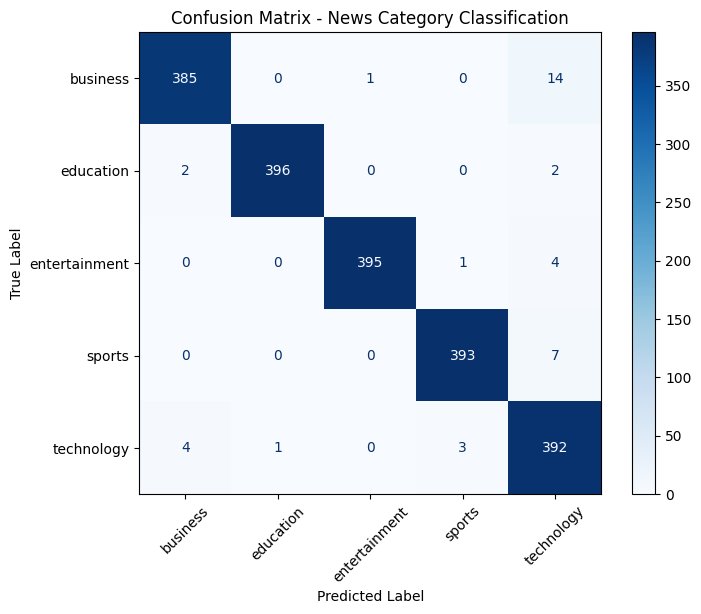

In [6]:
# 📊 Confusion Matrix Visualization
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

# Compute confusion matrix
cm = confusion_matrix(y_test, y_pred, labels=model.classes_)

# Create and plot the confusion matrix
disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=model.classes_)
fig, ax = plt.subplots(figsize=(8, 6))
disp.plot(cmap="Blues", ax=ax, xticks_rotation=45)
plt.title("Confusion Matrix - News Category Classification")
plt.xlabel("Predicted Label")
plt.ylabel("True Label")
plt.show()

## 💾 Saving the Model and TF-IDF Vectorizer

After training the classifier, both the **Logistic Regression model** and the **TF-IDF vectorizer** are saved together in a single pickle file.  
This makes it easy to reload them later for inference without retraining.

In [7]:
import pickle

with open('pickled_files/model_and_vectorizer.pkl', 'wb') as f:
    pickle.dump({'model': model, 'vectorizer': tfidf_vectorizer}, f)

print("Saved -> pickled_files/model_and_vectorizer.pkl")

Saved -> pickled_files/model_and_vectorizer.pkl


## 📊 Tracking the Model with MLflow

**MLflow** is used to record model parameters, metrics, and artifacts during training.  
It helps organize experiments, compare model versions, and maintain a complete history of how each model was built and evaluated.

---

### **Why This Step Matters**

- **Tracks Experiments Automatically** – MLflow logs each training run, capturing parameters like TF-IDF settings and model type.  
- **Logs Performance Metrics** – Key results such as training and validation accuracy are saved for future comparison.  
- **Stores Artifacts** – Both the trained model and the pickle file are stored as downloadable artifacts.  
- **Supports Model Versioning** – MLflow automatically registers models, assigning version numbers (e.g., *Version 1*).  
- **Ensures Reproducibility** – Every run can be revisited and exactly replicated later, making it easier to debug or deploy models.

---

### **Outcome**

- The trained model is logged and registered under the name **`NewsCategoryClassifier`** in the MLflow registry.  
- Parameters (`tfidf_max_features`, `ngram_range`, `max_iter`) and metrics (`train_accuracy`, `test_accuracy`) are stored for future reference.  
- A pickle file containing the model and TF-IDF vectorizer is attached to the run for manual reuse if needed.  

In [9]:
# If MLflow isn't installed yet: pip install mlflow
import mlflow
import mlflow.sklearn

mlflow.set_experiment("news_classification")

with mlflow.start_run(run_name="tfidf_logreg_baseline"):
    # Log key parameters
    mlflow.log_param("tfidf_max_features", 5000)
    mlflow.log_param("tfidf_ngram_range", "(1,2)")
    mlflow.log_param("model_type", "LogisticRegression")
    mlflow.log_param("max_iter", 1000)

    # Log metrics
    mlflow.log_metric("train_accuracy", float(train_accuracy))
    mlflow.log_metric("test_accuracy", float(test_accuracy))

    # Log the trained model
    mlflow.sklearn.log_model(
        sk_model=model,
        artifact_path="model",
        registered_model_name="NewsCategoryClassifier"
    )

    # Log your saved pickle file (optional)
    mlflow.log_artifact("pickled_files/model_and_vectorizer.pkl", artifact_path="pickle")

print("Logged run to MLflow.")

2025/10/08 15:12:51 WARNING mlflow.models.model: `artifact_path` is deprecated. Please use `name` instead.
2025/10/08 15:13:04 WARNING mlflow.models.model: Model logged without a signature and input example. Please set `input_example` parameter when logging the model to auto infer the model signature.
Successfully registered model 'NewsCategoryClassifier'.
Created version '1' of model 'NewsCategoryClassifier'.


Logged run to MLflow.


In [ ]:
input_text = input("Shares rise after RBI policy; Sensex closes higher")

In [ ]:
pt= process_text_pro(input_text)
pt

''

In [ ]:
vect_t = tfidf_vectorizer.transform([pt])

In [ ]:
vect_t

<Compressed Sparse Row sparse matrix of dtype 'float64'
	with 0 stored elements and shape (1, 5000)>

In [ ]:
model.predict(vect_t)

array(['technology'], dtype=object)

In [ ]:
breaker = True

while breaker:
    input_text = input("Enter Text to Classify, Enter End/Quit to end program")

    if input_text.lower() == "end" or input_text.lower() == "quit":
        break
    else:
        pt = process_text_pro(input_text)
        vect_t = tfidf_vectorizer.transform([pt])
        p_class = model.predict(vect_t)
        print(p_class)



['technology']


In [11]:
!git add model.ipynb
!git commit -m "Updating markdowns, adding MLflow"
!git push -u origin main

On branch main
Your branch is up to date with 'origin/main'.

Changes not staged for commit:
  (use "git add <file>..." to update what will be committed)
  (use "git restore <file>..." to discard changes in working directory)
	modified:   pickled_files/model_and_vectorizer.pkl

Untracked files:
  (use "git add <file>..." to include in what will be committed)
	mlruns/
	model_updated.ipynb

no changes added to commit (use "git add" and/or "git commit -a")
branch 'main' set up to track 'origin/main'.


Everything up-to-date
